# PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

In [1]:
# IMPORTING ALL NEEDED LIBRARIES


import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# STEP 1: IMPORTING THE DATA

In [2]:
lead_data=pd.read_csv("C:/Users/lenovo/Downloads/Lead Scoring Assignment/Leads.csv")

In [3]:
print(pd.get_option('display.max_rows'))
pd.set_option('display.max_columns', None)
lead_data.head()

60


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# STEP 2: INSPECTING DATAFRAME

In [4]:
lead_data.shape    # SHAPE OF THE DATAFRAME

(9240, 37)

In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# STEP 3:EXPLORATORY DATA ANALYSIS

In [7]:
# DATA CLEANING

#dropping Lead Number and Prospect ID since they have all unique values

lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [8]:
#Converting 'Select' values to NaN.

lead_data = lead_data.replace('Select', np.nan)

In [9]:
# % OF NULL VALUES


round(100*(lead_data.isnull().sum())/len(lead_data.index),2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
# DROPPING THE COLUMNS WITH MORE THAN 45% MISSING VALUE

lead_data = lead_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)


In [11]:
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [12]:
lead_data.shape

(9240, 28)

In [13]:
# WE CAN FILL THE MISSING VALUES WITH NOT AVAILABLE AS BY REMOVING THESE COLUMNS MAKES LOOSING MORE DATA

lead_data['Specialization'] = lead_data['Specialization'].fillna('NOT AVAILABLE')
lead_data['City'] = lead_data['City'].fillna('NOT AVAILABLE')
lead_data['Tags'] = lead_data['Tags'].fillna('NOT AVAILABLE')
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].fillna('NOT AVAILABLE')
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('NOT AVAILABLE')


In [14]:
lead_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [15]:
lead_data.Country.mode()[0]

'India'

In [16]:
lead_data.Country.fillna(lead_data.Country.mode()[0],inplace=True)

In [17]:
lead_data.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
round(100*(lead_data.isnull().sum())/len(lead_data.index),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
# CHECKING THE PERCENT OF LOSE IF THE NULL VALUES ARE REMOVED
round(100*(sum(lead_data.isnull().sum(axis=1) > 1)/lead_data.shape[0]),2)

1.48

In [20]:
lead_data = lead_data[lead_data.isnull().sum(axis=1) <1]

In [21]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

#### UNIVARIATE and BIVARIATE ANALYSIS

MISSING VALUE TREATMENT HAS DONE.SO WE CAN PROCEED THE UNIVARIATE AND BIVARIATE ANALYSIS

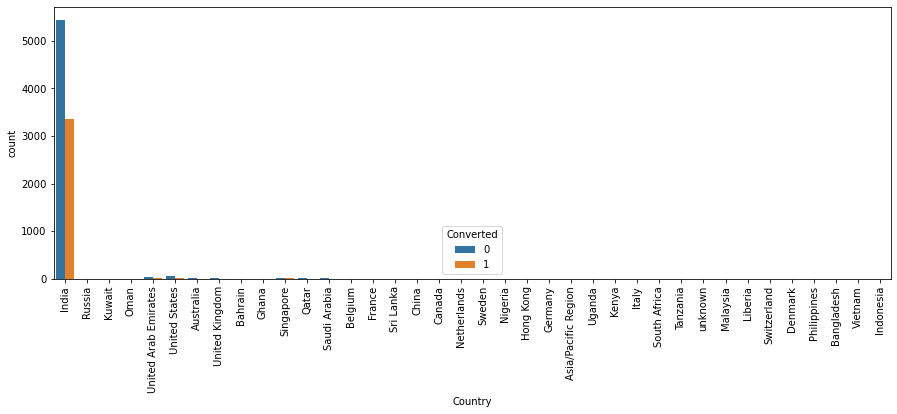

In [22]:
# FOR COUNTRY COLUMNS

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_data.Country, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

India has high value

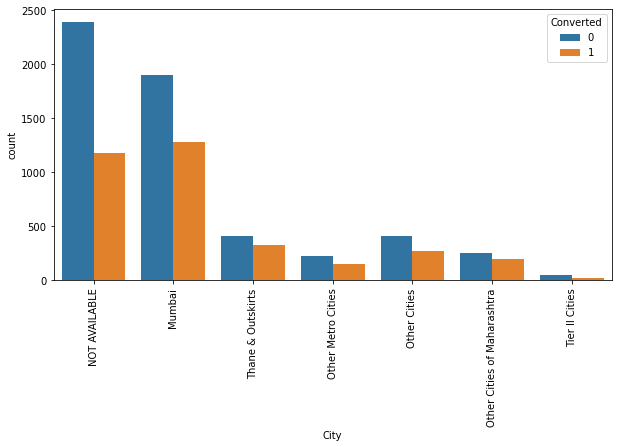

In [23]:
#FOR CITY COLUMN

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_data.City, hue=lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

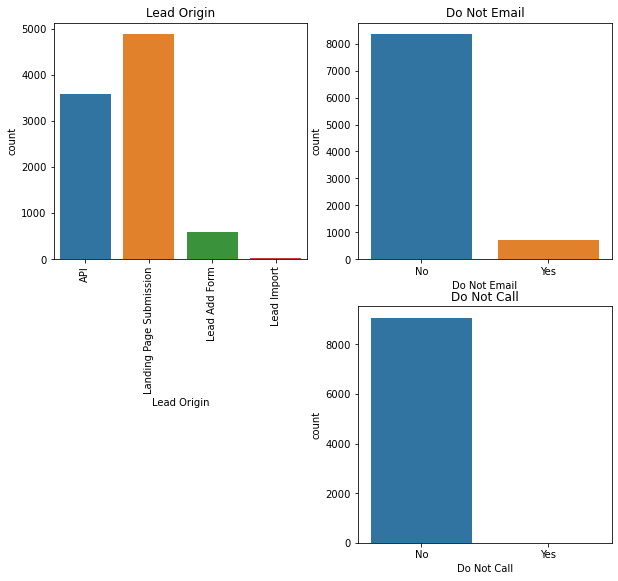

In [24]:
plt.figure(figsize = (10,20))

plt.subplot(4,2,1)
sns.countplot(lead_data['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(4,2,2)
sns.countplot(lead_data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,2,4)
sns.countplot(lead_data['Do Not Call'])
plt.title('Do Not Call')

plt.show()

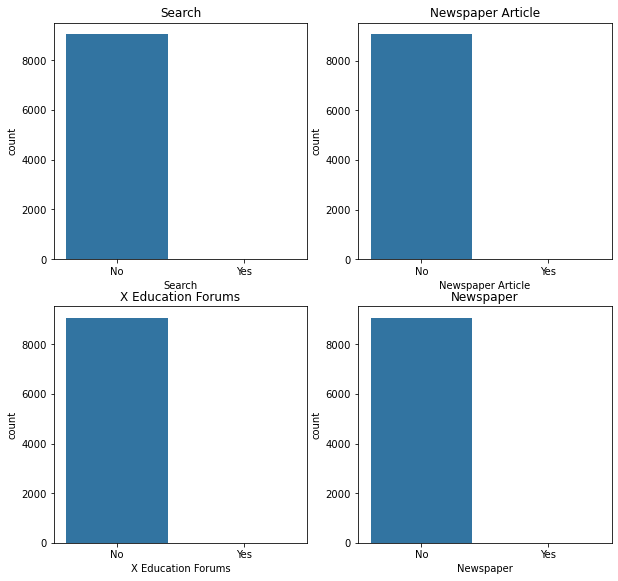

In [25]:
plt.figure(figsize = (10,20))

plt.subplot(4,2,1)
sns.countplot(lead_data['Search'])
plt.title('Search')

plt.subplot(4,2,2)
sns.countplot(lead_data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(4,2,3)
sns.countplot(lead_data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(4,2,4)
sns.countplot(lead_data['Newspaper'])
plt.title('Newspaper')

plt.show()

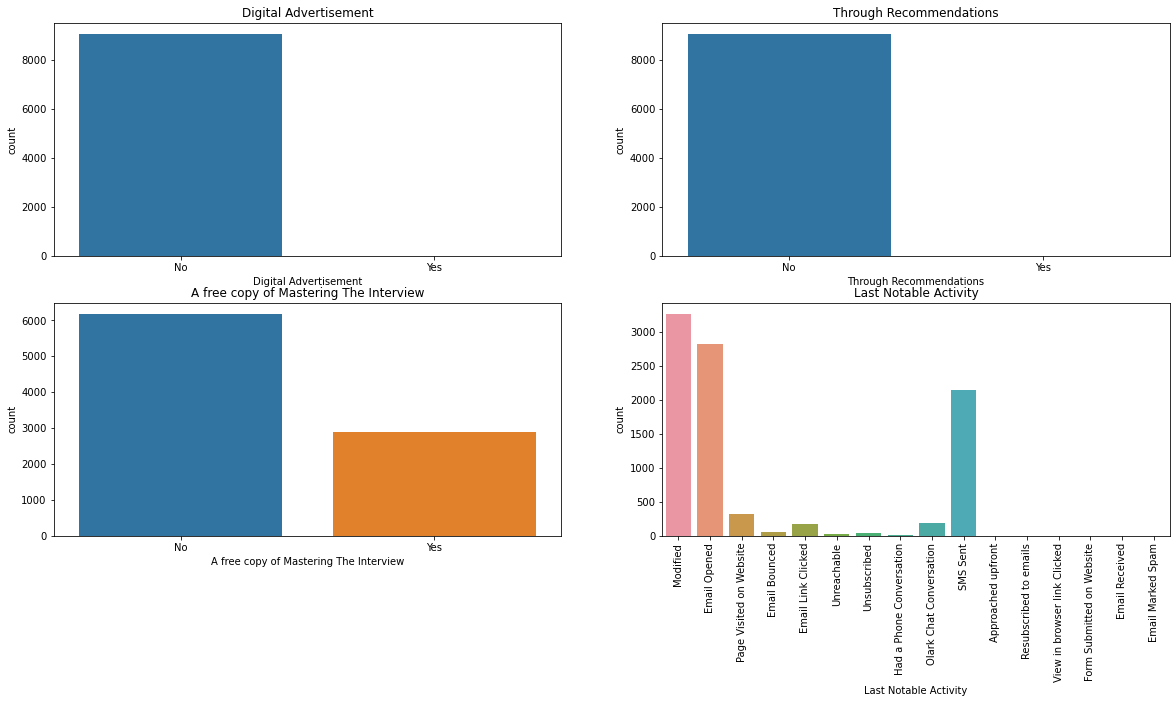

In [26]:
plt.figure(figsize = (20,30))

plt.subplot(6,2,9)
sns.countplot(lead_data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_data['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

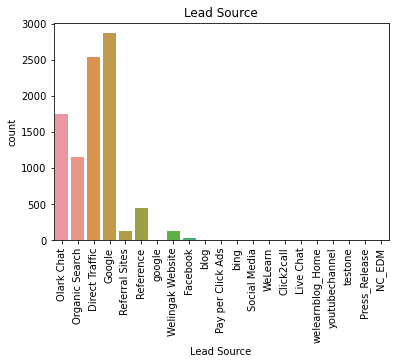

In [27]:
sns.countplot(lead_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

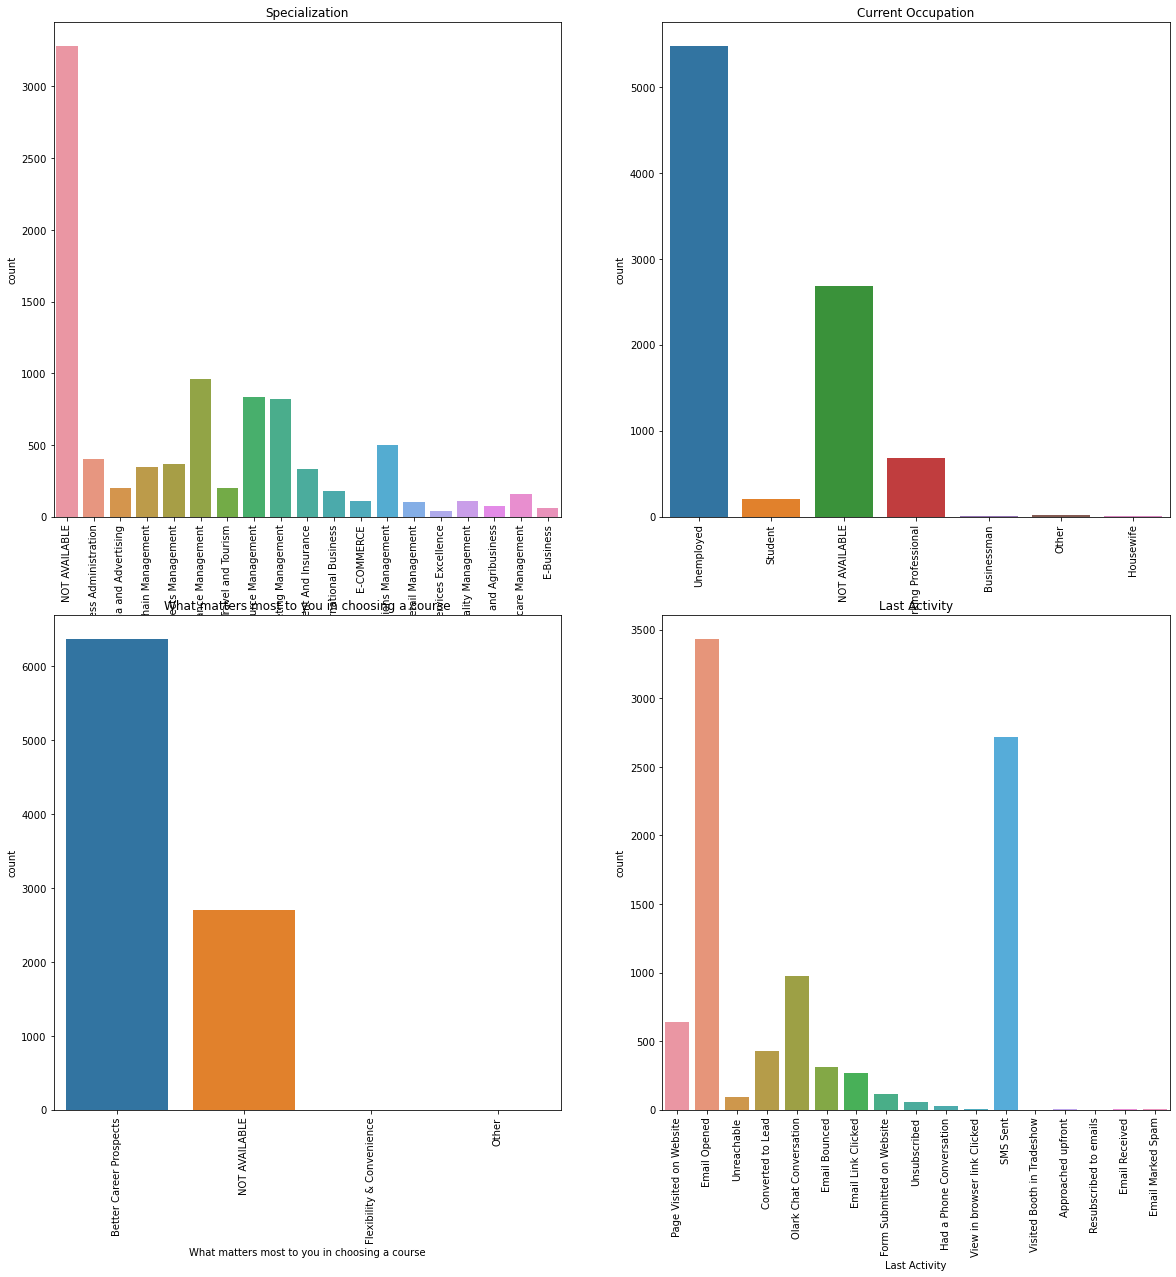

In [28]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(lead_data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(lead_data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(lead_data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(lead_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

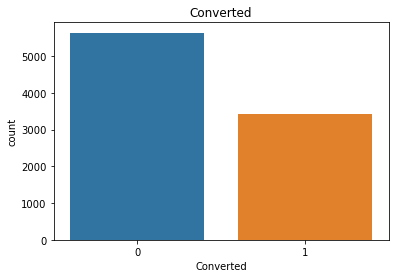

In [29]:
sns.countplot(lead_data['Converted'])
plt.title('Converted')
plt.show()

We saw the categorical variable distribution.Lets see the continous variable distribution

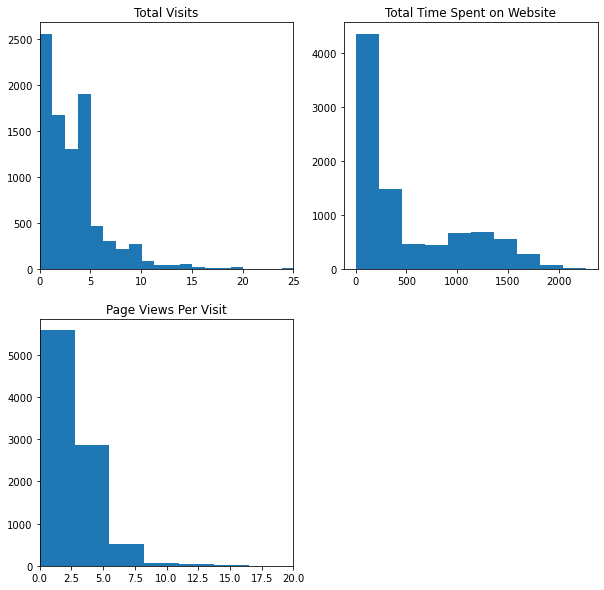

In [30]:
plt.figure(figsize = (10,10))

plt.subplot(221)
plt.hist(lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show( )         

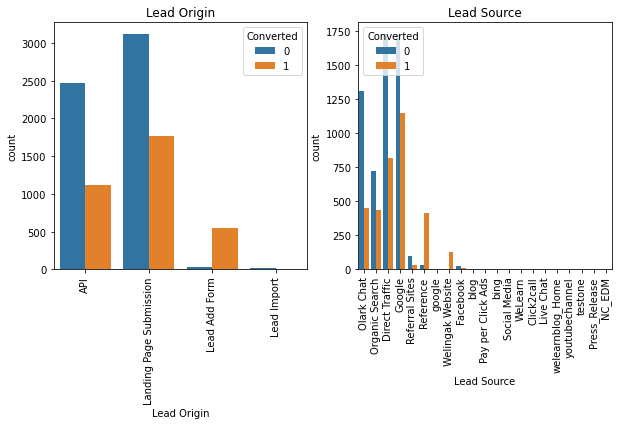

In [31]:
# CATEGORICAL VARIABLE VS CONVERTED

plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

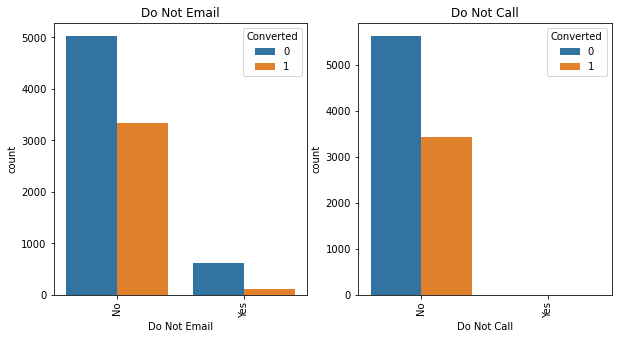

In [32]:
plt.figure(figsize=(10 ,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.show()

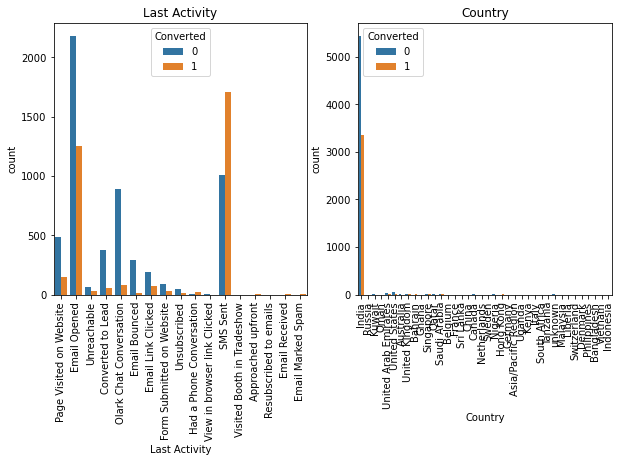

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

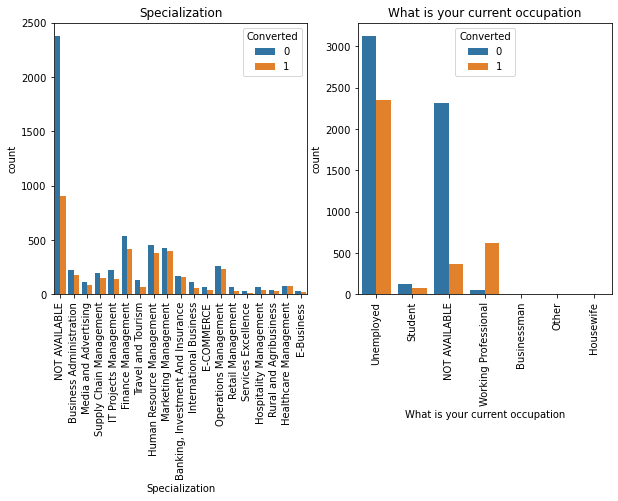

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

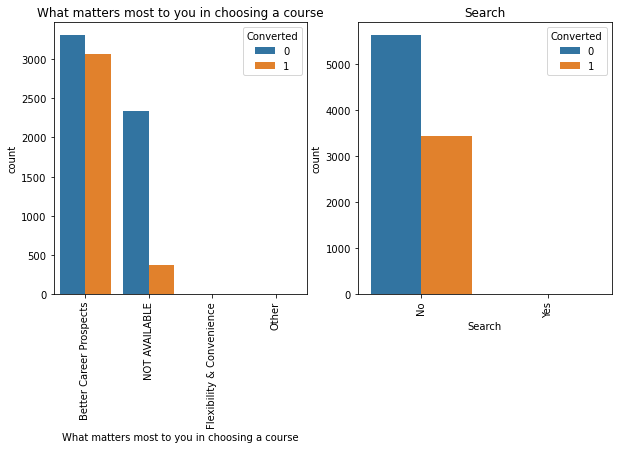

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.show()

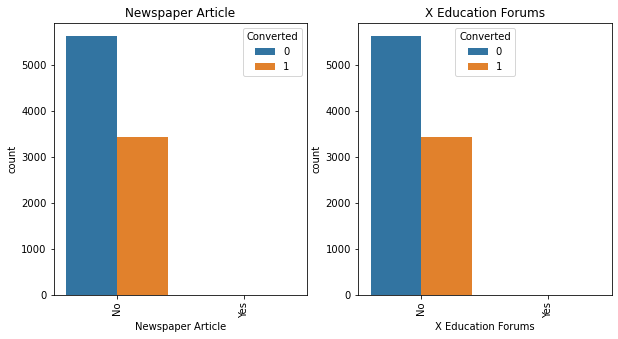

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.show()

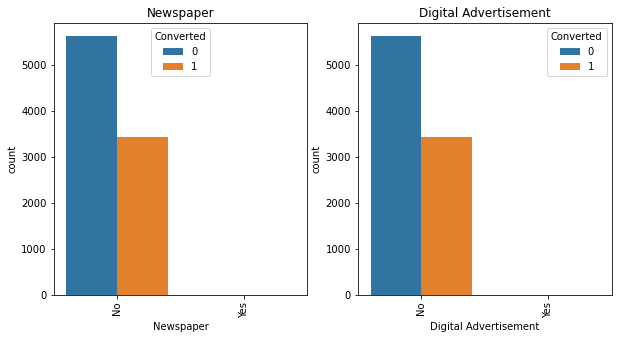

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.show()

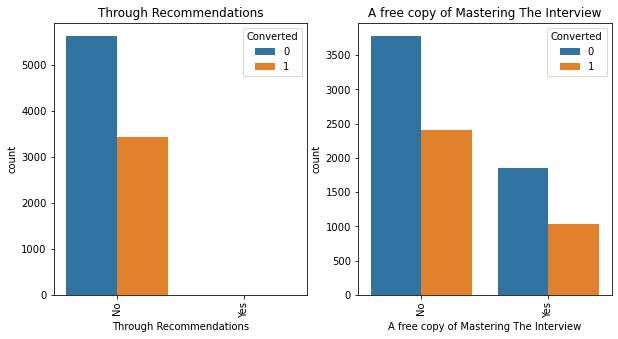

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

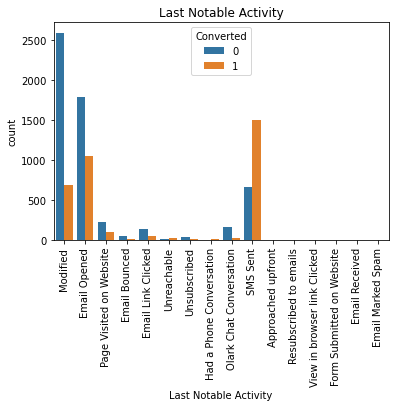

In [39]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [40]:
# Correlation table among the variables

lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


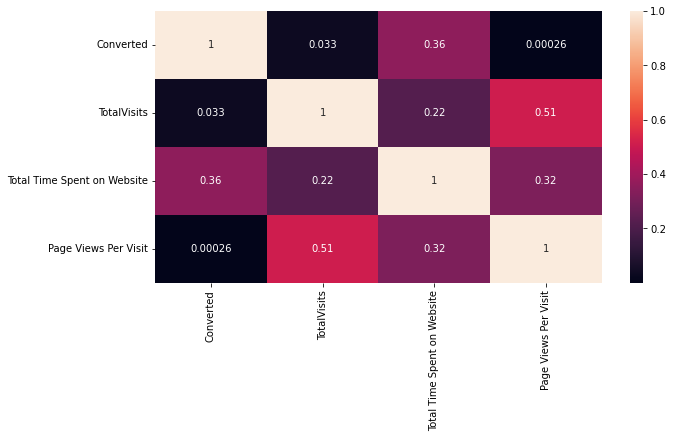

In [41]:
# So we can plot heatmap for correlation table

plt.figure(figsize=(10,5))
sns.heatmap(lead_data.corr(),annot=True)
plt.show()

So we can see that TotalVisits and Page Views Per Visit	have some correlation 

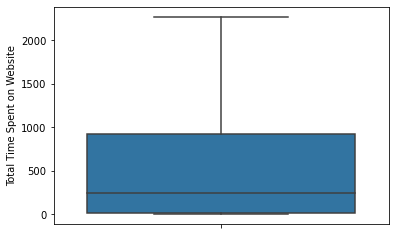

In [42]:
# Checking for outiliers

sns.boxplot(y=lead_data['Total Time Spent on Website'])
plt.show()

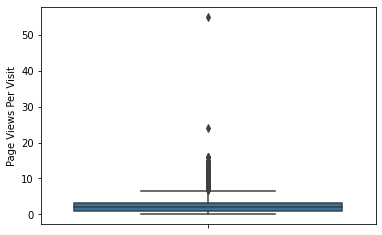

In [43]:
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

There are outliers.We have to treat them

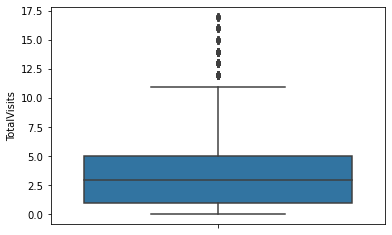

In [44]:
Q3 = lead_data.TotalVisits.quantile(0.99)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
Q1 = lead_data.TotalVisits.quantile(0.01)
lead_data = lead_data[(lead_data.TotalVisits >= Q1)]
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

# STEP 4:DATA PREPRATION

In [45]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Country                                        8991 

In [46]:
#Checking for unique data

lead_data.nunique()

Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        18
Total Time Spent on Website                      1713
Page Views Per Visit                               73
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  1
Newspaper                                           2
Digital Advertisement       

In [47]:
cols_to_drop=['Country','Tags','Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content']


We are dropping unique value columns.As tags variable is generated by the sales team after the disscussion with student. So we can drop the tags column otherwise it will increase the model accuracy .

In [48]:
lead_data = lead_data.drop(cols_to_drop,1)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [49]:
# Listing all categorical variables for creating dummy variables

cat_cols= lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
# So we can create the dummy variables

dummy = pd.get_dummies(lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Then we can add the dummy variables to origin dataframe

lead_data_dum = pd.concat([lead_data, dummy], axis=1)
lead_data_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NOT AVAILABLE,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NOT AVAILABLE,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NOT AVAILABLE,Unemployed,Better Career Prospects,No,No,No,No,No,No,NOT AVAILABLE,No,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NOT AVAILABLE,Unemployed,Better Career Prospects,No,No,No,No,No,No,NOT AVAILABLE,No,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Lan

In [51]:
# Now we can drop the original columns which are no longer use

lead_data_dum = lead_data_dum.drop(['City','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_data_dum


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NOT AVAILABLE,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NOT AVAILABLE,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

# STEP 5: SPLIT TRAIN AND TEST SET

In [52]:
X = lead_data_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NOT AVAILABLE,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NOT AVAILABLE,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
# Assigning the target variable on y

y = lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

# STEP 6: FEATURE SCALING

In [55]:
# Scaling with MinMaxScalar

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NOT AVAILABLE,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_NOT AVAILABLE,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# STEP 7: MODEL BUILDING

In [56]:
#Creating logistic regression object

lr = LogisticRegression()

In [57]:
# Running RFE with 15 variables as output

rfe = RFE(lr, 20)
rfe = rfe.fit(X_train, y_train)

In [58]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Specialization_Business Administration', False, 58),
 ('Specialization_E-Business', False, 26),
 ('Specialization_E-COMMERCE', False, 55),
 ('Specialization_Finance Management', False, 39),
 ('Specialization_Healthcare Management', False, 49),
 ('Specialization_Hospitality Management', False, 20),
 ('Specialization_Human Resource Management', False, 60),
 ('Specialization_IT Projects Management', False, 54),
 ('Specialization_International Business', False, 57),
 ('Specialization_Marketing Management', False, 40),
 ('Specialization_Media and Advertising', False, 21),
 ('Specialization_NOT AVAILABLE', True, 1),
 ('Specialization_Operations Management', False, 47),
 ('Specialization_Retail Management', False, 15),
 ('Specialization_Rural and Agribusi

In [59]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [60]:
# Selecting columns selected by RFE

X_train = X_train[col]

In [61]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.0
Date:                Mon, 19 Jun 2023   Deviance:                       4972.0
Time:                        02:01:12   Pearson chi2:                 6.42e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4149
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1584      0.167      0.946      0.344      -0.170       0.487
TotalVisits                                              1.7453      0.305      5.718      0.000       1.147       2.344
Total Time Spent on Website                              4.6419      0.173     26.769      0.000       4.302       4.982
Page Views Per Visit                                    -2.0242      0.454     -4.458      0.000      -2.914      -1.134
Lead Origin_Landing Page Submission                     -0.9029      0.132     -6.845      0.000      -1.161      -0.644
Lead Origin_Lead Add Form                                3.5700      0.273     13.090      0.000       3.035       4.105
Specialization_NOT AVAILABLE                            -0.8712      0.130     -6.716      0.000      -1.125      -0.617
Lead Source_Olark Chat                                   1.2754      0.139      9.148      0.000       1.002       1.549
Lead Source_Welingak Website                             2.9199      1.042      2.802      0.005       0.878       4.962
Do Not Email_Yes                                        -1.4347      0.209     -6.858      0.000      -1.845      -1.025
Last Activity_Email Bounced                             -1.1192      0.397     -2.817      0.005      -1.898      -0.341
Last Activity_Olark Chat Conversation                   -1.2789      0.200     -6.392      0.000      -1.671      -0.887
What is your current occupation_Housewife               23.1534   2.87e+04      0.001      0.999   -5.63e+04    5.63e+04
What is your current occupation_NOT AVAILABLE           -0.9741      0.090    -10.871      0.000      -1.150      -0.798
What is your current occupation_Working Professional     2.4057      0.193     12.437      0.000       2.027       2.785
Last Notable Activity_Email Link Clicked                -1.9659      0.270     -7.269      0.000      -2.496      -1.436
Last Notable Activity_Email Opened                      -1.3801      0.091    -15.145      0.000      -1.559      -1.202
Last Notable Activity_Had a Phone Conversation          22.1321   2.12e+04      0.001      0.999   -4.16e+04    4.17e+04
Last Notable Activity_Modified                          -1.7131      0.101    -17.045      0.000      -1.910      -1.516
Last Notable Activity_Olark Chat Conversation           -1.3822      0.388     -3.566      0.000      -2.142      -0.622
Last Notable Activity_Page Visited on Website           -2.0388      0.221     -9.228      0.000      -2.472      -1.606
========================================================================================================================
"""

In [62]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.05
0,TotalVisits,5.32
3,Lead Origin_Landing Page Submission,4.13
5,Specialization_NOT AVAILABLE,2.96
17,Last Notable Activity_Modified,2.60
6,Lead Source_Olark Chat,2.21
1,Total Time Spent on Website,2.13
15,Last Notable Activity_Email Opened,2.06
10,Last Activity_Olark Chat Conversation,2.00
8,Do Not Email_Yes,1.93


Some p-values are high. So removing ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.

### Model 2

In [63]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [64]:
# Refit the model 

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2491.1
Date:                Mon, 19 Jun 2023   Deviance:                       4982.3
Time:                        02:01:12   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4139
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1714      0.167      1.025      0.305      -0.156       0.499
TotalVisits                                              1.7393      0.304      5.713      0.000       1.143       2.336
Total Time Spent on Website                              4.6407      0.173     26.787      0.000       4.301       4.980
Page Views Per Visit                                    -2.0258      0.453     -4.467      0.000      -2.915      -1.137
Lead Origin_Landing Page Submission                     -0.9033      0.132     -6.857      0.000      -1.162      -0.645
Lead Origin_Lead Add Form                                3.5835      0.273     13.150      0.000       3.049       4.118
Specialization_NOT AVAILABLE                            -0.8779      0.130     -6.773      0.000      -1.132      -0.624
Lead Source_Olark Chat                                   1.2724      0.139      9.129      0.000       0.999       1.546
Lead Source_Welingak Website                             2.9041      1.042      2.787      0.005       0.862       4.946
Do Not Email_Yes                                        -1.4420      0.209     -6.891      0.000      -1.852      -1.032
Last Activity_Email Bounced                             -1.1186      0.397     -2.816      0.005      -1.897      -0.340
Last Activity_Olark Chat Conversation                   -1.2798      0.200     -6.396      0.000      -1.672      -0.888
What is your current occupation_NOT AVAILABLE           -0.9783      0.090    -10.919      0.000      -1.154      -0.803
What is your current occupation_Working Professional     2.4005      0.193     12.413      0.000       2.021       2.780
Last Notable Activity_Email Link Clicked                -1.9628      0.269     -7.296      0.000      -2.490      -1.436
Last Notable Activity_Email Opened                      -1.3843      0.091    -15.210      0.000      -1.563      -1.206
Last Notable Activity_Modified                          -1.7162      0.100    -17.096      0.000      -1.913      -1.519
Last Notable Activity_Olark Chat Conversation           -1.3847      0.388     -3.571      0.000      -2.145      -0.625
Last Notable Activity_Page Visited on Website           -2.0452      0.221     -9.260      0.000      -2.478      -1.612
========================================================================================================================
"""

In [65]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.05
0,TotalVisits,5.31
3,Lead Origin_Landing Page Submission,4.13
5,Specialization_NOT AVAILABLE,2.96
15,Last Notable Activity_Modified,2.60
6,Lead Source_Olark Chat,2.21
1,Total Time Spent on Website,2.13
14,Last Notable Activity_Email Opened,2.05
10,Last Activity_Olark Chat Conversation,2.00
8,Do Not Email_Yes,1.93


Page Views Per Visit has high VIF(>5) VIF should be<5.SO we can remove the variable

### Model 3

In [66]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [67]:
# Refit the model

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.3
Date:                Mon, 19 Jun 2023   Deviance:                       5002.5
Time:                        02:01:13   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4120
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0227      0.161     -0.141      0.888      -0.339       0.293
TotalVisits                                              0.9619      0.250      3.852      0.000       0.472       1.451
Total Time Spent on Website                              4.6272      0.173     26.765      0.000       4.288       4.966
Lead Origin_Landing Page Submission                     -0.9478      0.131     -7.221      0.000      -1.205      -0.691
Lead Origin_Lead Add Form                                3.7432      0.270     13.844      0.000       3.213       4.273
Specialization_NOT AVAILABLE                            -0.8584      0.129     -6.638      0.000      -1.112      -0.605
Lead Source_Olark Chat                                   1.4170      0.136     10.434      0.000       1.151       1.683
Lead Source_Welingak Website                             2.8927      1.042      2.776      0.005       0.851       4.935
Do Not Email_Yes                                        -1.4704      0.208     -7.069      0.000      -1.878      -1.063
Last Activity_Email Bounced                             -1.0318      0.394     -2.617      0.009      -1.804      -0.259
Last Activity_Olark Chat Conversation                   -1.2717      0.200     -6.370      0.000      -1.663      -0.880
What is your current occupation_NOT AVAILABLE           -0.9777      0.089    -10.937      0.000      -1.153      -0.802
What is your current occupation_Working Professional     2.3998      0.194     12.399      0.000       2.020       2.779
Last Notable Activity_Email Link Clicked                -1.9085      0.267     -7.146      0.000      -2.432      -1.385
Last Notable Activity_Email Opened                      -1.3533      0.090    -14.962      0.000      -1.531      -1.176
Last Notable Activity_Modified                          -1.6854      0.100    -16.875      0.000      -1.881      -1.490
Last Notable Activity_Olark Chat Conversation           -1.3012      0.383     -3.398      0.001      -2.052      -0.551
Last Notable Activity_Page Visited on Website           -1.8450      0.213     -8.660      0.000      -2.263      -1.427
========================================================================================================================
"""

In [68]:
# Make a VIF dataframe 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.65
0,TotalVisits,3.04
4,Specialization_NOT AVAILABLE,2.88
14,Last Notable Activity_Modified,2.59
5,Lead Source_Olark Chat,2.17
1,Total Time Spent on Website,2.11
13,Last Notable Activity_Email Opened,2.05
9,Last Activity_Olark Chat Conversation,2.00
7,Do Not Email_Yes,1.92
8,Last Activity_Email Bounced,1.85


### SUMMARY

The VIF values are looking good which means values are <5.And the P-values also almost zero

# STEP 8: CREATING PREDICTION

In [69]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.521707
3267    0.996842
5653    0.415565
5072    0.142458
3704    0.130351
1790    0.021647
2482    0.183450
1694    0.106489
8768    0.114817
9225    0.007434
dtype: float64

In [70]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52170657, 0.99684233, 0.41556487, 0.14245835, 0.13035112,
       0.02164682, 0.18345024, 0.10648872, 0.11481676, 0.0074344 ])

In [71]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.521707
1,1,0.996842
2,1,0.415565
3,0,0.142458
4,0,0.130351


In [72]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.521707,1
1,1,0.996842,1
2,1,0.415565,0
3,0,0.142458,0
4,0,0.130351,0


# STEP 9: MODEL EVALUATION

In [73]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  429],
       [ 696, 1682]], dtype=int64)

In [74]:
# Checking accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8212299380263786

The accuracy value looking good which is 82%

In [75]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [76]:
# Calculating the sensitivity

TP/(TP+FN)

0.7073170731707317

In [77]:
# Calculating the specificity

TN/(TN+FP)

0.8904214559386974

With 0.5 cut off value we have sensitivity 71% and specificity 89%.We select this cut off value randomly.So we have to find the optimal cut off value with the Technique of ROC curve 

In [78]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

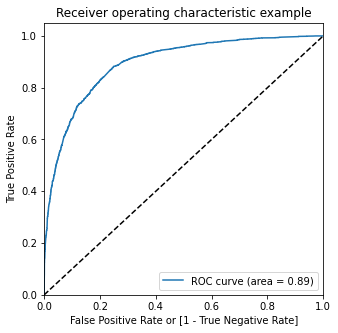

In [80]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the ROC curve is 89%.Which is very good value.The more value the model is good

In [81]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.521707,1,1,1,1,1,1,1,0,0,0,0
1,1,0.996842,1,1,1,1,1,1,1,1,1,1,1
2,1,0.415565,0,1,1,1,1,1,0,0,0,0,0
3,0,0.142458,0,1,1,0,0,0,0,0,0,0,0
4,0,0.130351,0,1,1,0,0,0,0,0,0,0,0


In [82]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.623550,0.973928,0.410728
0.2,0.2,0.771651,0.915475,0.684291
0.3,0.3,0.803432,0.867115,0.764751
0.4,0.4,0.815668,0.775442,0.840102
0.5,0.5,0.821230,0.707317,0.890421
0.6,0.6,0.811219,0.629100,0.921839
0.7,0.7,0.788972,0.521026,0.951724
0.8,0.8,0.769267,0.438183,0.970370
0.9,0.9,0.728905,0.304037,0.986973


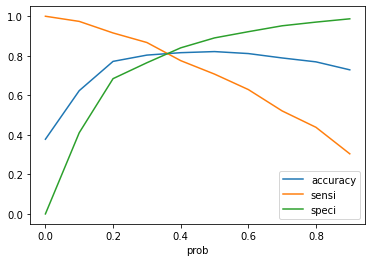

In [83]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35

In [101]:
#Rechecking with optimal cutoff value 0.35

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head(20)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.521707,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.996842,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.415565,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.142458,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.130351,0,1,1,0,0,0,0,0,0,0,0,0
5,0,0.021647,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0.183450,0,1,1,0,0,0,0,0,0,0,0,0
7,0,0.106489,0,1,1,0,0,0,0,0,0,0,0,0
8,0,0.114817,0,1,1,0,0,0,0,0,0,0,0,0
9,0,0.007434,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
#  Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812807881773399

In [86]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3174,  741],
       [ 437, 1941]], dtype=int64)

In [87]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [88]:
# Sensitivity

TP/(TP+FN)

0.8162321278385197

In [89]:
# Specificity

TN/(TN+FP)

0.810727969348659

With optimal cutoff value 0.35 the values of accuracy,sensitivity and specificity are looking good and almost equal and also >80%

# STEP 10: MAKING PREDICTION ON THE TEST SET

In [90]:
#Scaling

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [91]:
col = X_train.columns

In [92]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]

# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_NOT AVAILABLE,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_NOT AVAILABLE,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [93]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

# Coverting it to df

y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.053823
1,1,0.801282
2,1,0.484075
3,0,0.032332
4,0,0.283105


In [94]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.053823,0
1,1,0.801282,1
2,1,0.484075,1
3,0,0.032332,0
4,0,0.283105,0
...,...,...,...
2693,1,0.169505,0
2694,1,0.757221,1
2695,0,0.052691,0
2696,1,0.963868,1


In [95]:
# Accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8124536693847294

In [96]:
# Confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1352,  325],
       [ 181,  840]], dtype=int64)

In [97]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [98]:
# Calculating the sensitivity

TP/(TP+FN)

0.8227228207639569

In [99]:
# Calculating the specificity

TN/(TN+FP)

0.8062015503875969

With the optimal cut off range 0.35 the accuracy ,sensitivity and speificity values are good on test set also

# CONCLUSION

### It was found that the variables that mattered the most in the potential buyers are (In descending order) :

Lead Origin_Landing Page Submission

TotalVisits	

Specialization_NOT AVAILABLE

Last Notable Activity_Modified

Lead Source_Olark Chat	

Total Time Spent on Website	

Last Notable Activity_Email Opened

Last Activity_Olark Chat Conversation

Do Not Email_Yes

Last Activity_Email Bounced	

What is your current occupation_NOT AVAILABLE

Lead Origin_Lead Add Form	

Lead Source_Welingak Website	

Last Notable Activity_Olark Chat Conversation	

What is your current occupation_Working Profes...

Last Notable Activity_Page Visited on Website	

Last Notable Activity_Email Link Clicked

### Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.